In [5]:
import altair as alt
import pandas as pd

# Your data
data_3ak = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [3, 5, 6, 38, 20, 7, 5, 1, 4, 1, 2, 4, 0, 2, 1]
}

data_3am = {
        'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [3, 0, 15, 43, 22, 11, 7, 4, 3, 3, 2, 0, 2, 0, 0]
}

data_3e = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [22, 12, 158, 80, 36, 20, 20, 8, 10, 5, 2, 1, 0, 4, 1]
}

data_3g = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [8, 3, 3, 41, 35, 8, 5, 7, 1, 5, 2, 4, 1, 3, 1]
}

df = pd.DataFrame(data_3g)

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('AF_range', sort=df['AF_range'].tolist(), title='AF Range'),
    y=alt.Y('Count', title='Variant Count'),
    tooltip=['AF_range', 'Count']
).properties(
    width=600,
    height=300,
    title='3G (descending colon) vs 3A (blood) AF Distribution'
)

chart

alt.Chart(...)

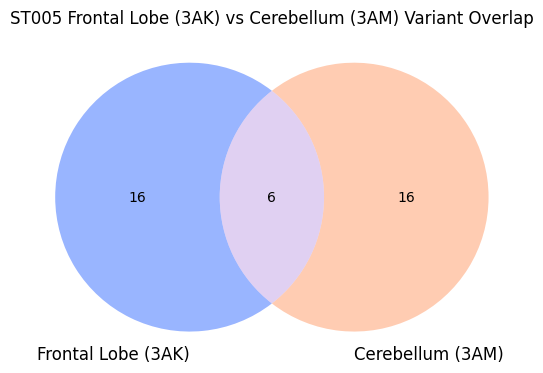

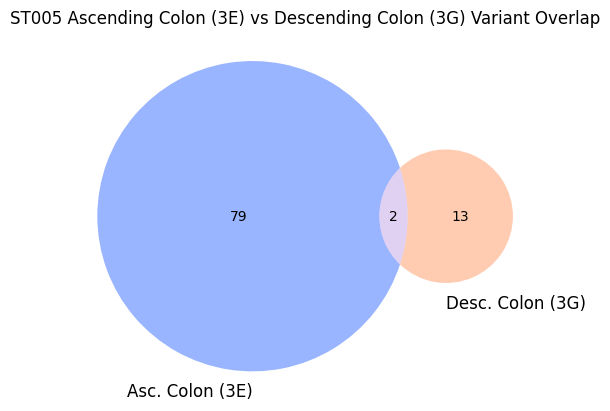

In [15]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# brain smht005
venn2(subsets = (16, 16, 6), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)'), set_colors=('#0046FF', '#FF8040'))
plt.title("ST005 Frontal Lobe (3AK) vs Cerebellum (3AM) Variant Overlap")
plt.show()

# colon smht005
venn2(subsets = (79, 13, 2), set_labels = ('Asc. Colon (3E)', 'Desc. Colon (3G)'), set_colors=('#0046FF', '#FF8040'))
plt.title("ST005 Ascending Colon (3E) vs Descending Colon (3G) Variant Overlap")
plt.show()


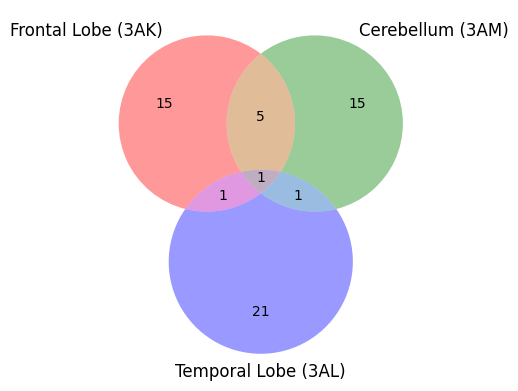

In [14]:
from matplotlib_venn import venn3

v=venn3(subsets = (15, 15, 5, 21, 1, 1, 1), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)', 'Temporal Lobe (3AL)'))
plt.show()

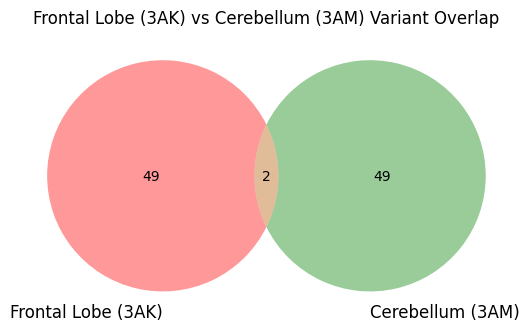

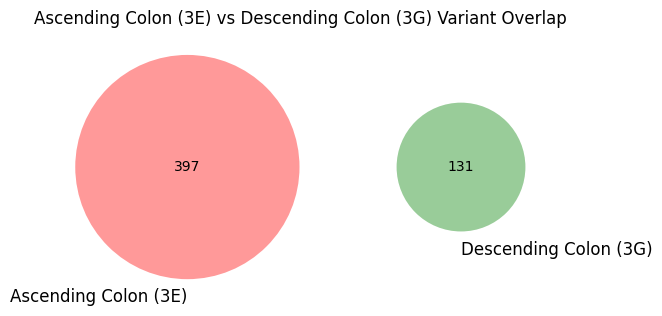

In [7]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (49, 49, 2), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)'))
plt.title("Frontal Lobe (3AK) vs Cerebellum (3AM) Variant Overlap")
plt.show()

venn2(subsets = (397, 131, 0), set_labels = ('Ascending Colon (3E)', 'Descending Colon (3G)'))
plt.title("Ascending Colon (3E) vs Descending Colon (3G) Variant Overlap")
plt.show()


In [ ]:
# TODO: upset plot